<a href="https://colab.research.google.com/github/wetjie/Practical-Discrete-Mathematics/blob/master/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scale the image

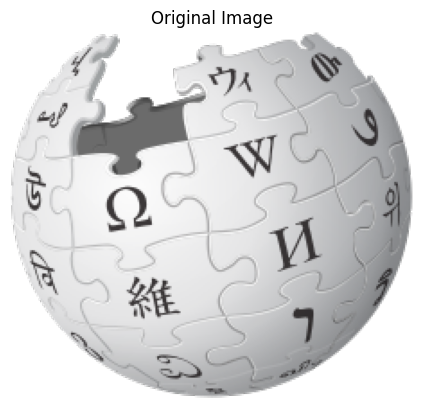

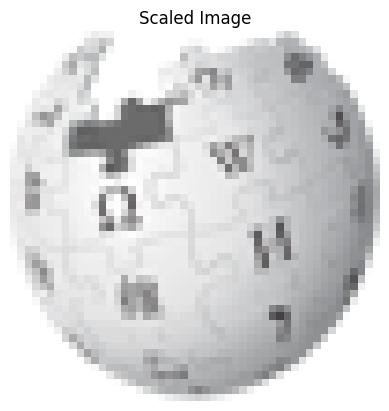

In [ ]:
#get the info
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Scale the image
new_size = (50, 50)  # Replace with your desired size
scaled_img = img.resize(new_size)

# Display the scaled image
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')
plt.show()

1.Transpose the image 90 degree

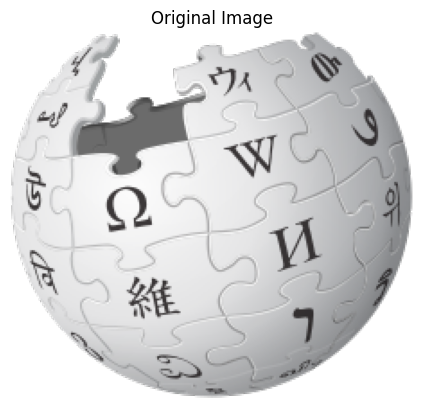

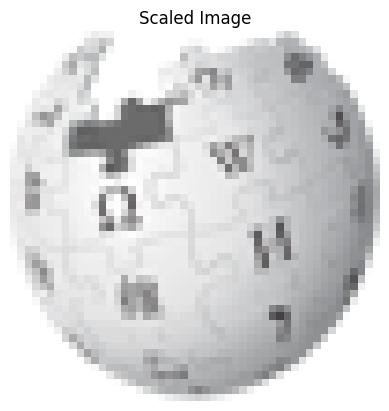

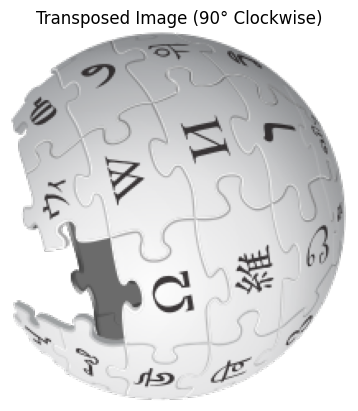

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Scale the image
new_size = (50, 50)  # Desired size
scaled_img = img.resize(new_size)

# Display the scaled image
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')
plt.show()

# Transpose the scaled image 90 degrees clockwise
transposed_img = img.transpose(Image.ROTATE_90)

# Display the transposed image
plt.imshow(transposed_img)
plt.title('Transposed Image (90° Clockwise)')
plt.axis('off')
plt.show()


2.https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de  remove the background of the image. ONLY maintain the character

In [4]:
!pip install mediapipe opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 49.3 MB/s eta 0:00:00


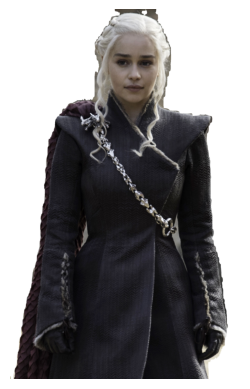

In [13]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# URL of the image
url = "https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de"

# Read the image from the URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Save the color image with no background
cv2.imwrite("color_image_no_bg.png", image_no_bg)

# Display the result
plt.imshow(image_no_bg)
plt.axis("off")
plt.show()

3.Find 2 creative common images online. Combine these 2 images side by side vertically. Export it as Jpg

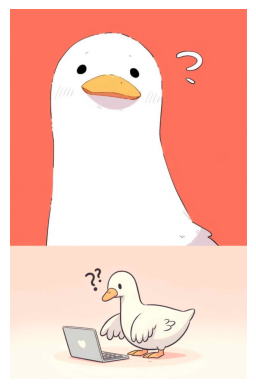

In [27]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# URLs of the images
url1 = "https://img.taotu.cn/ssd/ssd4/1/2023-08-09/1_421374c85a89b421f6795689bf8a93ba.jpg"
url2 = "https://bizhi1.com/wp-content/uploads/2024/02/funny-goose-looking-at-laptop-beige-desktop-wallpaper-small.jpg"

# Function to read image from URL
def read_image_from_url(url):
    try:
        resp = urllib.request.urlopen(url)
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if image is None:
            raise ValueError("Image not loaded properly")
        return image
    except Exception as e:
        print(f"Error loading image from {url}: {e}")
        return None

# Read the images from the URLs
image1 = read_image_from_url(url1)
image2 = read_image_from_url(url2)

# Check if both images are loaded successfully
if image1 is not None and image2 is not None:
    # Ensure both images have the same width
    width = min(image1.shape[1], image2.shape[1])
    image1_resized = cv2.resize(image1, (width, int(image1.shape[0] * width / image1.shape[1])))
    image2_resized = cv2.resize(image2, (width, int(image2.shape[0] * width / image2.shape[1])))

    # Combine the images vertically
    combined_image = np.vstack((image1_resized, image2_resized))

    # Save the combined image as JPG
    cv2.imwrite("combined_image.jpg", combined_image)

    # Display the combined image
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("One or both images could not be loaded. Please check the URLs.")

4.Change the image colour to gray tone.

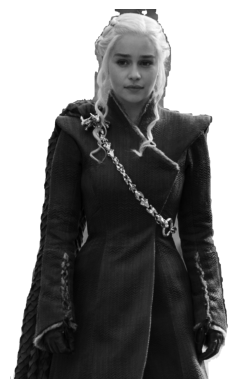

In [7]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# URL of the image
url = "https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de"

# Read the image from the URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Convert the image to gray tone
image_gray = cv2.cvtColor(image_no_bg, cv2.COLOR_RGB2GRAY)

# Save the gray tone image
cv2.imwrite("gray_tone_image.png", image_gray)

# Display the result
plt.imshow(image_gray, cmap='gray')
plt.axis("off")
plt.show()